In [1]:
import numpy as np
import pandas as pd
import sys
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
samplefile = pd.read_csv('Finished_data.csv', nrows = 10000)
fullfile = pd.read_csv('Finished_data.csv')
fullfile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
Customer_ID                50000 non-null object
Total_sale                 50000 non-null float64
Ticket_size                50000 non-null float64
ARPU_Month                 50000 non-null float64
Total_number_of_product    50000 non-null int64
Total_visit                50000 non-null int64
AVG_QUANTITY_PER_VISIT     50000 non-null float64
AGE_OF_USAGE_MONTH         50000 non-null int64
ACTIVE_MONTH               50000 non-null int64
AVERAGE_SPEND_PER_MONTH    50000 non-null float64
Number_of_products         50000 non-null int64
NO_OF_FRESHFOOD            50000 non-null int64
NO_OF_Grocery              50000 non-null int64
NO_OF_Mixed                50000 non-null int64
NO_OF_Nonfood              50000 non-null int64
dtypes: float64(5), int64(9), object(1)
memory usage: 5.7+ MB


In [3]:
samplefile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
Customer_ID                10000 non-null object
Total_sale                 10000 non-null float64
Ticket_size                10000 non-null float64
ARPU_Month                 10000 non-null float64
Total_number_of_product    10000 non-null int64
Total_visit                10000 non-null int64
AVG_QUANTITY_PER_VISIT     10000 non-null float64
AGE_OF_USAGE_MONTH         10000 non-null int64
ACTIVE_MONTH               10000 non-null int64
AVERAGE_SPEND_PER_MONTH    10000 non-null float64
Number_of_products         10000 non-null int64
NO_OF_FRESHFOOD            10000 non-null int64
NO_OF_Grocery              10000 non-null int64
NO_OF_Mixed                10000 non-null int64
NO_OF_Nonfood              10000 non-null int64
dtypes: float64(5), int64(9), object(1)
memory usage: 1.1+ MB


In [4]:
fullfile.isnull().sum()

Customer_ID                0
Total_sale                 0
Ticket_size                0
ARPU_Month                 0
Total_number_of_product    0
Total_visit                0
AVG_QUANTITY_PER_VISIT     0
AGE_OF_USAGE_MONTH         0
ACTIVE_MONTH               0
AVERAGE_SPEND_PER_MONTH    0
Number_of_products         0
NO_OF_FRESHFOOD            0
NO_OF_Grocery              0
NO_OF_Mixed                0
NO_OF_Nonfood              0
dtype: int64

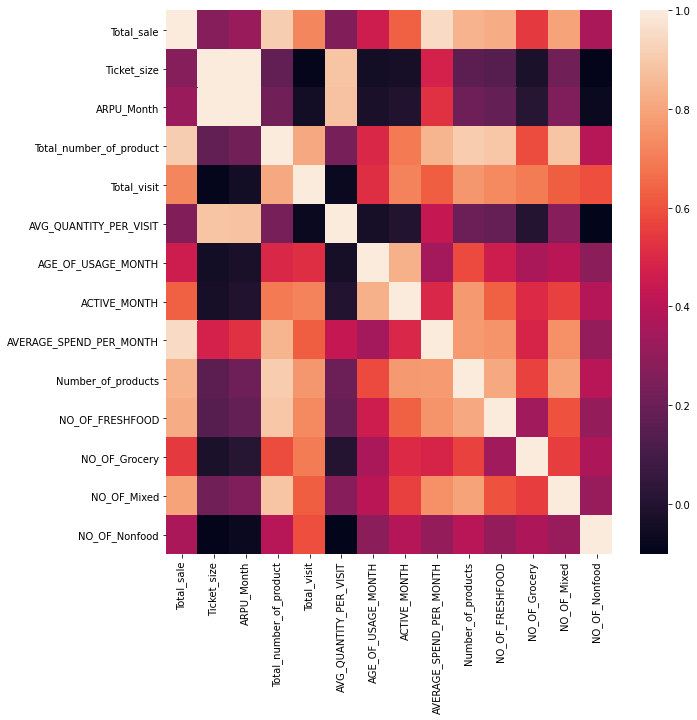

In [5]:
corr = fullfile.corr()

fig, ax = plt.subplots(figsize=(10,10))  
ax = sns.heatmap( corr )

# Kmeans

In [34]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import time
sc = StandardScaler()
sns.set()

In [7]:
new_fullfile = fullfile.drop(['Customer_ID'], axis=1)
new_fullfile.head()

Total_sale  Ticket_size  ARPU_Month  Total_number_of_product  Total_visit  \
0       18.91       3.1517       3.782                       25            6   
1       21.39       7.1300       7.130                       15            3   
2        5.22       2.6100       2.610                        4            2   
3       13.02       6.5100       6.510                        6            2   
4       18.00       9.0000       9.000                       10            2   

   AVG_QUANTITY_PER_VISIT  AGE_OF_USAGE_MONTH  ACTIVE_MONTH  \
0                  5.6667                   1             2   
1                  5.0000                   1             2   
2                  2.0000                  22             2   
3                  3.0000                  20             2   
4                 11.0000                   4             2   

   AVERAGE_SPEND_PER_MONTH  Number_of_products  NO_OF_FRESHFOOD  \
0                    9.455                  17                9   
1                   10.695                  14               15   
2                    2.610                   2                4   
3                    6.510                   3                6   
4                    9.000                  10                7   

   NO_OF_Grocery  NO_OF_Mixed  NO_OF_Nonfood  
0              0           16              0  
1              0            0              0  
2              0            0              0  
3              0            0              0  
4              3            0              0

## Standard scaler

In [13]:
# Scale แค่ 4 columns ที่เป็น Continuous เท่านั้น

In [16]:
X1 = new_fullfile.iloc[:,[0,1,2,8]]
X2 = new_fullfile.drop(['Total_sale','Ticket_size','ARPU_Month','AVERAGE_SPEND_PER_MONTH'], axis=1)
X1.head()

Total_sale  Ticket_size  ARPU_Month  AVERAGE_SPEND_PER_MONTH
0       18.91       3.1517       3.782                    9.455
1       21.39       7.1300       7.130                   10.695
2        5.22       2.6100       2.610                    2.610
3       13.02       6.5100       6.510                    6.510
4       18.00       9.0000       9.000                    9.000

In [24]:
X = sc.fit_transform(X1)
# X = fullfile.drop(['Customer_ID'])
X_scale_df = pd.DataFrame(data = X, columns = X1.columns)

X_scale_df = X_scale_df.join(X2)
X_scale_df.head()

Total_sale  Ticket_size  ARPU_Month  AVERAGE_SPEND_PER_MONTH  \
0   -0.659161    -0.857533   -0.844053                -0.724270   
1   -0.657423    -0.548068   -0.587102                -0.699679   
2   -0.668753    -0.899671   -0.934001                -0.860015   
3   -0.663288    -0.596297   -0.634685                -0.782673   
4   -0.659799    -0.402605   -0.443584                -0.733293   

   Total_number_of_product  Total_visit  AVG_QUANTITY_PER_VISIT  \
0                       25            6                  5.6667   
1                       15            3                  5.0000   
2                        4            2                  2.0000   
3                        6            2                  3.0000   
4                       10            2                 11.0000   

   AGE_OF_USAGE_MONTH  ACTIVE_MONTH  Number_of_products  NO_OF_FRESHFOOD  \
0                   1             2                  17                9   
1                   1             2                  14               15   
2                  22             2                   2                4   
3                  20             2                   3                6   
4                   4             2                  10                7   

   NO_OF_Grocery  NO_OF_Mixed  NO_OF_Nonfood  
0              0           16              0  
1              0            0              0  
2              0            0              0  
3              0            0              0  
4              3            0              0

In [25]:
# Scale ทั้งหมดทุก columns

In [27]:
X_scale = sc.fit_transform(new_fullfile)
X_scale_all_df = pd.DataFrame(data = X_scale, columns = new_fullfile.columns)

In [28]:
X_scale_all_df.head()

Total_sale  Ticket_size  ARPU_Month  Total_number_of_product  Total_visit  \
0   -0.659161    -0.857533   -0.844053                -0.694381    -0.706759   
1   -0.657423    -0.548068   -0.587102                -0.708986    -0.737093   
2   -0.668753    -0.899671   -0.934001                -0.725051    -0.747204   
3   -0.663288    -0.596297   -0.634685                -0.722130    -0.747204   
4   -0.659799    -0.402605   -0.443584                -0.716288    -0.747204   

   AVG_QUANTITY_PER_VISIT  AGE_OF_USAGE_MONTH  ACTIVE_MONTH  \
0               -0.564647           -1.691370     -1.251475   
1               -0.640017           -1.691370     -1.251475   
2               -0.979164            0.334435     -1.251475   
3               -0.866115            0.141502     -1.251475   
4                0.038278           -1.401969     -1.251475   

   AVERAGE_SPEND_PER_MONTH  Number_of_products  NO_OF_FRESHFOOD  \
0                -0.724270           -0.849959        -0.638470   
1                -0.699679           -0.867527        -0.622806   
2                -0.860015           -0.937798        -0.651524   
3                -0.782673           -0.931942        -0.646302   
4                -0.733293           -0.890951        -0.643692   

   NO_OF_Grocery  NO_OF_Mixed  NO_OF_Nonfood  
0      -0.552252    -0.543353      -0.428995  
1      -0.552252    -0.593463      -0.428995  
2      -0.552252    -0.593463      -0.428995  
3      -0.552252    -0.593463      -0.428995  
4      -0.518079    -0.593463      -0.428995

###  สรุป X_scale_all_df คือ Scale หมดทุก columns ส่วน X_scale_df คือ Scale แค่ 4 columns

# Modeling (Kmeans)

## Define k in Kmeans using Elbow method

In [32]:
from sklearn.cluster import KMeans
score = []
n_list = list(range(2,20))

for n in n_list:
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_scale_df)
    score.append(kmeans.inertia_)

Text(0, 0.5, 'Error')

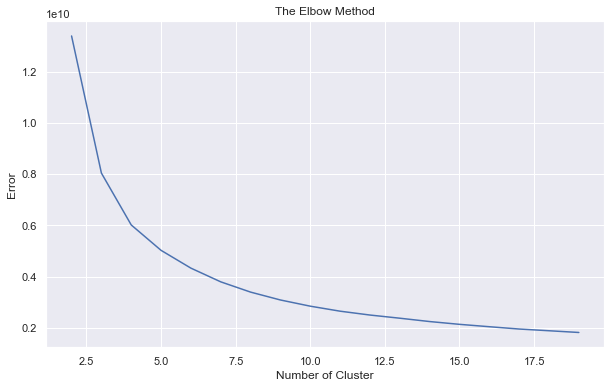

In [33]:
plt.figure(figsize=(10,6))
plt.plot(n_list,score)
plt.title('The Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('Error')

## Select K = 5

### 1. กรณีใช้ X_scale_df คือ Scale แค่ตัวแปรที่เป็น Continuous

In [37]:
kmeans = KMeans(n_clusters = 5, random_state = 42)

start = time.time()

kmeans.fit(X_scale_df)

end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 1.502979040145874


In [38]:
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [40]:
df_result1 = X_scale_df.copy()
df_result1['Cluster'] = kmeans.labels_
df_result1.head()

Total_sale  Ticket_size  ARPU_Month  AVERAGE_SPEND_PER_MONTH  \
0   -0.659161    -0.857533   -0.844053                -0.724270   
1   -0.657423    -0.548068   -0.587102                -0.699679   
2   -0.668753    -0.899671   -0.934001                -0.860015   
3   -0.663288    -0.596297   -0.634685                -0.782673   
4   -0.659799    -0.402605   -0.443584                -0.733293   

   Total_number_of_product  Total_visit  AVG_QUANTITY_PER_VISIT  \
0                       25            6                  5.6667   
1                       15            3                  5.0000   
2                        4            2                  2.0000   
3                        6            2                  3.0000   
4                       10            2                 11.0000   

   AGE_OF_USAGE_MONTH  ACTIVE_MONTH  Number_of_products  NO_OF_FRESHFOOD  \
0                   1             2                  17                9   
1                   1             2                  14               15   
2                  22             2                   2                4   
3                  20             2                   3                6   
4                   4             2                  10                7   

   NO_OF_Grocery  NO_OF_Mixed  NO_OF_Nonfood  Cluster  
0              0           16              0        1  
1              0            0              0        1  
2              0            0              0        1  
3              0            0              0        1  
4              3            0              0        1

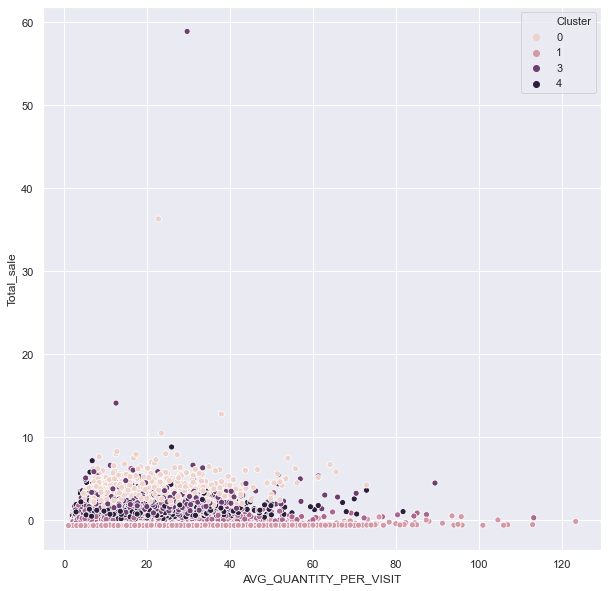

In [43]:
fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.scatterplot(x='AVG_QUANTITY_PER_VISIT', y='Total_sale', data=df_result1, hue= df_result1['Cluster'])

### ใส่ Index ให้กับข้อมูล

In [46]:
index = np.array([i for i in range(1,len(fullfile)+1)])
print(index)
df_result1['Index'] = index
df_result1.head()

[    1     2     3 ... 49998 49999 50000]


Total_sale  Ticket_size  ARPU_Month  AVERAGE_SPEND_PER_MONTH  \
0   -0.659161    -0.857533   -0.844053                -0.724270   
1   -0.657423    -0.548068   -0.587102                -0.699679   
2   -0.668753    -0.899671   -0.934001                -0.860015   
3   -0.663288    -0.596297   -0.634685                -0.782673   
4   -0.659799    -0.402605   -0.443584                -0.733293   

   Total_number_of_product  Total_visit  AVG_QUANTITY_PER_VISIT  \
0                       25            6                  5.6667   
1                       15            3                  5.0000   
2                        4            2                  2.0000   
3                        6            2                  3.0000   
4                       10            2                 11.0000   

   AGE_OF_USAGE_MONTH  ACTIVE_MONTH  Number_of_products  NO_OF_FRESHFOOD  \
0                   1             2                  17                9   
1                   1             2                  14               15   
2                  22             2                   2                4   
3                  20             2                   3                6   
4                   4             2                  10                7   

   NO_OF_Grocery  NO_OF_Mixed  NO_OF_Nonfood  Cluster  Index  
0              0           16              0        1      1  
1              0            0              0        1      2  
2              0            0              0        1      3  
3              0            0              0        1      4  
4              3            0              0        1      5

In [47]:
# เรียงลำดับ Columns ใหม่
df_result1 = df_result1[['Index','Cluster','Total_sale','Ticket_size','ARPU_Month','AVERAGE_SPEND_PER_MONTH',
                      'Total_number_of_product','Total_visit','AVG_QUANTITY_PER_VISIT','AGE_OF_USAGE_MONTH',
                      'ACTIVE_MONTH','Number_of_products','NO_OF_FRESHFOOD','NO_OF_Grocery','NO_OF_Mixed',
                      'NO_OF_Nonfood']]
df_result1.head()

Index  Cluster  Total_sale  Ticket_size  ARPU_Month  \
0      1        1   -0.659161    -0.857533   -0.844053   
1      2        1   -0.657423    -0.548068   -0.587102   
2      3        1   -0.668753    -0.899671   -0.934001   
3      4        1   -0.663288    -0.596297   -0.634685   
4      5        1   -0.659799    -0.402605   -0.443584   

   AVERAGE_SPEND_PER_MONTH  Total_number_of_product  Total_visit  \
0                -0.724270                       25            6   
1                -0.699679                       15            3   
2                -0.860015                        4            2   
3                -0.782673                        6            2   
4                -0.733293                       10            2   

   AVG_QUANTITY_PER_VISIT  AGE_OF_USAGE_MONTH  ACTIVE_MONTH  \
0                  5.6667                   1             2   
1                  5.0000                   1             2   
2                  2.0000                  22             2   
3                  3.0000                  20             2   
4                 11.0000                   4             2   

   Number_of_products  NO_OF_FRESHFOOD  NO_OF_Grocery  NO_OF_Mixed  \
0                  17                9              0           16   
1                  14               15              0            0   
2                   2                4              0            0   
3                   3                6              0            0   
4                  10                7              3            0   

   NO_OF_Nonfood  
0              0  
1              0  
2              0  
3              0  
4              0

In [49]:
### Save เก็บเป็นไฟล์ .csv ไว้
df_result1.to_csv('Output_1.csv', encoding = 'utf-8-sig', index = False, header = False)


### 2. กรณีใช้ X_scale_all_df คือ Scale ข้อมูลทุก Columns เลย

In [54]:
kmeans2 = KMeans(n_clusters = 5, random_state = 42)

start = time.time()

kmeans2.fit(X_scale_all_df)

end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 1.7186338901519775


In [55]:
kmeans2.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [115]:
df_result2 = X_scale_all_df.copy()
df_result2['Cluster'] = kmeans2.labels_
df_result2.head()

Total_sale  Ticket_size  ARPU_Month  Total_number_of_product  Total_visit  \
0   -0.659161    -0.857533   -0.844053                -0.694381    -0.706759   
1   -0.657423    -0.548068   -0.587102                -0.708986    -0.737093   
2   -0.668753    -0.899671   -0.934001                -0.725051    -0.747204   
3   -0.663288    -0.596297   -0.634685                -0.722130    -0.747204   
4   -0.659799    -0.402605   -0.443584                -0.716288    -0.747204   

   AVG_QUANTITY_PER_VISIT  AGE_OF_USAGE_MONTH  ACTIVE_MONTH  \
0               -0.564647           -1.691370     -1.251475   
1               -0.640017           -1.691370     -1.251475   
2               -0.979164            0.334435     -1.251475   
3               -0.866115            0.141502     -1.251475   
4                0.038278           -1.401969     -1.251475   

   AVERAGE_SPEND_PER_MONTH  Number_of_products  NO_OF_FRESHFOOD  \
0                -0.724270           -0.849959        -0.638470   
1                -0.699679           -0.867527        -0.622806   
2                -0.860015           -0.937798        -0.651524   
3                -0.782673           -0.931942        -0.646302   
4                -0.733293           -0.890951        -0.643692   

   NO_OF_Grocery  NO_OF_Mixed  NO_OF_Nonfood  Cluster  
0      -0.552252    -0.543353      -0.428995        1  
1      -0.552252    -0.593463      -0.428995        1  
2      -0.552252    -0.593463      -0.428995        1  
3      -0.552252    -0.593463      -0.428995        1  
4      -0.518079    -0.593463      -0.428995        1

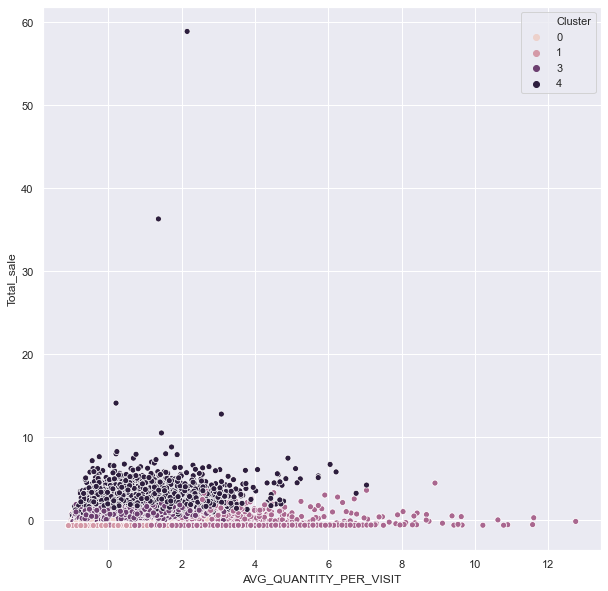

In [57]:
fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.scatterplot(x='AVG_QUANTITY_PER_VISIT', y='Total_sale', data=df_result2, hue= df_result2['Cluster'])

In [59]:
index = np.array([i for i in range(1,len(fullfile)+1)])
print(index)
df_result2['Index'] = index
df_result2.head()

[    1     2     3 ... 49998 49999 50000]


Total_sale  Ticket_size  ARPU_Month  Total_number_of_product  Total_visit  \
0   -0.659161    -0.857533   -0.844053                -0.694381    -0.706759   
1   -0.657423    -0.548068   -0.587102                -0.708986    -0.737093   
2   -0.668753    -0.899671   -0.934001                -0.725051    -0.747204   
3   -0.663288    -0.596297   -0.634685                -0.722130    -0.747204   
4   -0.659799    -0.402605   -0.443584                -0.716288    -0.747204   

   AVG_QUANTITY_PER_VISIT  AGE_OF_USAGE_MONTH  ACTIVE_MONTH  \
0               -0.564647           -1.691370     -1.251475   
1               -0.640017           -1.691370     -1.251475   
2               -0.979164            0.334435     -1.251475   
3               -0.866115            0.141502     -1.251475   
4                0.038278           -1.401969     -1.251475   

   AVERAGE_SPEND_PER_MONTH  Number_of_products  NO_OF_FRESHFOOD  \
0                -0.724270           -0.849959        -0.638470   
1                -0.699679           -0.867527        -0.622806   
2                -0.860015           -0.937798        -0.651524   
3                -0.782673           -0.931942        -0.646302   
4                -0.733293           -0.890951        -0.643692   

   NO_OF_Grocery  NO_OF_Mixed  NO_OF_Nonfood  Cluster  Index  
0      -0.552252    -0.543353      -0.428995        1      1  
1      -0.552252    -0.593463      -0.428995        1      2  
2      -0.552252    -0.593463      -0.428995        1      3  
3      -0.552252    -0.593463      -0.428995        1      4  
4      -0.518079    -0.593463      -0.428995        1      5

In [60]:
# เรียงลำดับ Columns ใหม่
df_result2 = df_result2[['Index','Cluster','Total_sale','Ticket_size','ARPU_Month','AVERAGE_SPEND_PER_MONTH',
                      'Total_number_of_product','Total_visit','AVG_QUANTITY_PER_VISIT','AGE_OF_USAGE_MONTH',
                      'ACTIVE_MONTH','Number_of_products','NO_OF_FRESHFOOD','NO_OF_Grocery','NO_OF_Mixed',
                      'NO_OF_Nonfood']]
df_result2.head()

Index  Cluster  Total_sale  Ticket_size  ARPU_Month  \
0      1        1   -0.659161    -0.857533   -0.844053   
1      2        1   -0.657423    -0.548068   -0.587102   
2      3        1   -0.668753    -0.899671   -0.934001   
3      4        1   -0.663288    -0.596297   -0.634685   
4      5        1   -0.659799    -0.402605   -0.443584   

   AVERAGE_SPEND_PER_MONTH  Total_number_of_product  Total_visit  \
0                -0.724270                -0.694381    -0.706759   
1                -0.699679                -0.708986    -0.737093   
2                -0.860015                -0.725051    -0.747204   
3                -0.782673                -0.722130    -0.747204   
4                -0.733293                -0.716288    -0.747204   

   AVG_QUANTITY_PER_VISIT  AGE_OF_USAGE_MONTH  ACTIVE_MONTH  \
0               -0.564647           -1.691370     -1.251475   
1               -0.640017           -1.691370     -1.251475   
2               -0.979164            0.334435     -1.251475   
3               -0.866115            0.141502     -1.251475   
4                0.038278           -1.401969     -1.251475   

   Number_of_products  NO_OF_FRESHFOOD  NO_OF_Grocery  NO_OF_Mixed  \
0           -0.849959        -0.638470      -0.552252    -0.543353   
1           -0.867527        -0.622806      -0.552252    -0.593463   
2           -0.937798        -0.651524      -0.552252    -0.593463   
3           -0.931942        -0.646302      -0.552252    -0.593463   
4           -0.890951        -0.643692      -0.518079    -0.593463   

   NO_OF_Nonfood  
0      -0.428995  
1      -0.428995  
2      -0.428995  
3      -0.428995  
4      -0.428995

In [61]:
### Save เก็บเป็นไฟล์ .csv ไว้
df_result2.to_csv('Output_2(All).csv', encoding = 'utf-8-sig', index = False, header = False)



# Kmeans + PCA


#### ใช้ PCA ลดมิติของข้อมูลให้เหลือ 2 components เสมือนเป็นจุด x กับ y
#### ต้องใช้ kmeans ใหม่เนื่องจากข้อมูลเหลือเพียงแค่ 2 Component

In [62]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state = 42)

### 1. กรณีใช้ข้อมูล X_scale_df

In [134]:
pca.fit(X_scale_df)
X_pca1 = pca.transform(X_scale_df)
X_pca_df1 = pd.DataFrame(data = X_pca1, columns = ['Component_1', 'Component_2'])
print(X_pca_df1.shape)
X_pca_df1.head()

(50000, 2)


Component_1  Component_2
0  -585.113684   -14.375062
1  -596.992095     1.539647
2  -612.758161    -5.274794
3  -610.116263    -4.017810
4  -605.029265    -4.172136

In [135]:
# ทำ Kmeans ใหม่ในกรณีที่ใช้ข้อมูลแบบบ PCA
kmeans_pca1 = KMeans(n_clusters = 5, random_state = 42)
kmeans_pca1.fit(X_pca_df1)

df_PCA_result1 = X_pca_df1.copy()
df_PCA_result1['Cluster'] = kmeans_pca1.labels_
print(df_PCA_result1['Cluster'].value_counts())
df_PCA_result1.head()

1    28759
0    10354
4     6126
3     3527
2     1234
Name: Cluster, dtype: int64


Component_1  Component_2  Cluster
0  -585.113684   -14.375062        1
1  -596.992095     1.539647        1
2  -612.758161    -5.274794        1
3  -610.116263    -4.017810        1
4  -605.029265    -4.172136        1

In [136]:
df_PCA_result1.iloc[:,1:2]

Component_2
0       -14.375062
1         1.539647
2        -5.274794
3        -4.017810
4        -4.172136
...            ...
49995    -7.962196
49996   -10.191849
49997    -6.007657
49998    -5.381654
49999   -14.110689

[50000 rows x 1 columns]

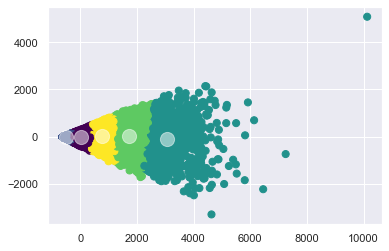

In [96]:
plt.scatter(df_PCA_result1.iloc[:,:1] ,df_PCA_result1.iloc[:,1:2], c=kmeans_pca1.labels_, s=50, cmap='viridis')

centers = kmeans_pca1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='white', s=200, alpha=0.5);

In [137]:
# Set index and cluster
index = np.array([i for i in range(1,len(fullfile)+1)])
print(index)
df_PCA_result1['Index'] = index

df_PCA_result1 = df_PCA_result1[['Index','Cluster','Component_1','Component_2']]
df_PCA_result1

[    1     2     3 ... 49998 49999 50000]


Index  Cluster  Component_1  Component_2
0          1        1  -585.113684   -14.375062
1          2        1  -596.992095     1.539647
2          3        1  -612.758161    -5.274794
3          4        1  -610.116263    -4.017810
4          5        1  -605.029265    -4.172136
...      ...      ...          ...          ...
49995  49996        1  -617.292481    -7.962196
49996  49997        1  -614.286024   -10.191849
49997  49998        1  -614.038203    -6.007657
49998  49999        1  -612.621880    -5.381654
49999  50000        1  -607.565854   -14.110689

[50000 rows x 4 columns]

In [138]:
# save to csv
df_PCA_result1.to_csv('Output_pca1.csv',encoding = 'utf-8-sig',header= False, index = False)

### 2. กรณีใช้ข้อมูล X_scale_all_df

In [105]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state = 42)

In [106]:
pca.fit(X_scale_all_df)
X_pca2 = pca.transform(X_scale_all_df)
X_pca_df2 = pd.DataFrame(data = X_pca2, columns = ['Component_1', 'Component_2'])
print(X_pca_df2.shape)
X_pca_df2.head()

(50000, 2)


Component_1  Component_2
0    -2.752725    -0.487678
1    -2.725175    -0.216369
2    -2.478172    -1.127923
3    -2.415972    -0.705949
4    -2.585272     0.221449

In [107]:
# ทำ Kmeans ใหม่ในกรณีที่ใช้ข้อมูลแบบ PCA (ข้อมูลใหม่ Scale ทุก cols)
kmeans_pca2 = KMeans(n_clusters = 5, random_state = 42)
kmeans_pca2.fit(X_pca_df2)

df_PCA_result2 = X_pca_df2.copy()
df_PCA_result2['Cluster'] = kmeans_pca2.labels_
print(df_PCA_result2['Cluster'].value_counts())
df_PCA_result2.head()

0    21311
1    13131
2     7752
3     4969
4     2837
Name: Cluster, dtype: int64


Component_1  Component_2  Cluster
0    -2.752725    -0.487678        0
1    -2.725175    -0.216369        0
2    -2.478172    -1.127923        0
3    -2.415972    -0.705949        0
4    -2.585272     0.221449        0

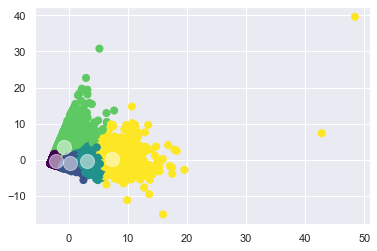

In [109]:
plt.scatter(df_PCA_result2.iloc[:,:1] ,df_PCA_result2.iloc[:,1:2], c=kmeans_pca2.labels_, s=50, cmap='viridis')

centers = kmeans_pca2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='white', s=200, alpha=0.5);

In [111]:
# Set index and cluster
index = np.array([i for i in range(1,len(fullfile)+1)])
print(index)
df_PCA_result2['Index'] = index

df_PCA_result2 = df_PCA_result2[['Index','Cluster','Component_1','Component_2']]
df_PCA_result2

[    1     2     3 ... 49998 49999 50000]


Index  Cluster  Component_1  Component_2
0          1        0    -2.752725    -0.487678
1          2        0    -2.725175    -0.216369
2          3        0    -2.478172    -1.127923
3          4        0    -2.415972    -0.705949
4          5        0    -2.585272     0.221449
...      ...      ...          ...          ...
49995  49996        0    -3.026634    -0.945089
49996  49997        0    -2.936493    -0.563677
49997  49998        0    -2.873428    -0.297752
49998  49999        0    -2.918679    -0.494638
49999  50000        0    -2.482955     1.240420

[50000 rows x 4 columns]

In [139]:
# save to csv
df_PCA_result2.to_csv('Output_pca2(all).csv',encoding = 'utf-8-sig',header= False, index = False)

# BFR

In [151]:
from sklearn.cluster import KMeans
import numpy as np
import time
import sys
import math

## build_dict function is to create a dict, key = label, value = [index]
def build_dict_index(all_labels):
    dict_label_indexofdata = {}  ##{label:[index1, index2]}
    for indexoflabel in range(len(all_labels)):
        if all_labels[indexoflabel] in dict_label_indexofdata:
            dict_label_indexofdata[all_labels[indexoflabel]].append(indexoflabel)
        else:
            dict_label_indexofdata[all_labels[indexoflabel]] = []
            dict_label_indexofdata[all_labels[indexoflabel]].append(indexoflabel)
    return dict_label_indexofdata


def build_dict_data(all_labels, data):
    dict_label_data = {}
    for indexoflabel in range(len(all_labels)):
        # print(indexoflabel)
        temp_label = all_labels[indexoflabel]
        if temp_label in dict_label_data:
            dict_label_data[temp_label].append(data[indexoflabel])
        else:
            dict_label_data[temp_label] = []
            dict_label_data[temp_label].append(data[indexoflabel])
    return dict_label_data


def find_index_RS(dict_label_indexofdata):
    RS_index = []
    for i in dict_label_indexofdata:
        if len(dict_label_indexofdata[i]) == 1:
            temp_index = dict_label_indexofdata[i][0]
            RS_index.append(temp_index)
    return RS_index

# def find_index_notRS(dict_label_indexofdata):
#     notRS_index = []
#     for i in dict_label_indexofdata:
#         if len(dict_label_indexofdata[i]) != 1:
#             temp_index = dict_label_indexofdata[i][0]
#             RS_index.append(temp_index)
#     return RS_index

def find_cs_data(dict_lable_data_s6):
    dict_lable_csdata = {}
    for key in dict_lable_data_s6:
        if len(dict_lable_data_s6[key]) != 1:
            dict_lable_csdata[key] = dict_lable_data_s6[key]
    return dict_lable_csdata


def generate_sum_count_sumsqr(dict_label_data):
    DS = []
    for key in dict_label_data:
        dict_label_data[key] = np.array(dict_label_data[key])
        # print(dict_label_data[key])
        temp_sum = np.sum(dict_label_data[key][:, 2:], axis=0)
        # print(temp_sum)

        # print(temp_sum)
        temp_count = len(dict_label_data[key])
        # print(temp_count)
        temp_sum_sq = np.sum([np.square(num) for num in dict_label_data[key][:, 2:]], axis=0)
        # print(temp_sum_sq)

        temp_index = []
        temp_label = []
        for i in dict_label_data[key]:
            # print(i)
            temp_index.append(i[0])
            temp_label.append(i[1])

        temp = [temp_sum, temp_count, temp_sum_sq, temp_index, temp_label]
        # print(temp)
        DS.append(temp)
    return np.array(DS)


def calculate_mahalanobis(datapoint,clusterdata):
    centroid = clusterdata[0] / clusterdata[1]
    sigma2 = clusterdata[2]/clusterdata[1] - centroid**2
    normalize = (datapoint - centroid)**2/sigma2
    # print(sigma2)
    distance = pow(normalize.sum(), 0.5)
    # distance = math.sqrt(np.sum(normalize))
    return distance

s = time.perf_counter()


file_path = 'Textfile data/Output_pca2(all).txt'  # แก้ Input ตรงนี้ Index, cluster, features...
                                               # (.txt file) 

    
file = open(file_path, 'r', encoding = 'utf-8-sig')
file_list = []
for each_line in file.readlines():
    temp_line = each_line.strip("\n").split("\t")
    temp_line_int = []
    # for each_feature in temp_line[2:]:
    for each_feature in temp_line:
        temp_line_int.append(float(each_feature))
    # print(temp_line_int)
    file_list.append(temp_line_int)


## file_list has 12 col, the first col is index, the second col is label
file_length = len(file_list)
# print(file_length)
percentage = 0.2
d= 10 # แก้ตรงนี้จะลด Threshold
k = 14
# k = 10
threshold = 2 * pow(d,0.5)
pro = 0.8
i = 0

## init_data  is the first 20% data, type is np.array
init_data = np.array(file_list[:int(file_length*percentage)])
# print(init_data)
# print(len(init_data))
# print(init_data[:, 2:])

## step 2 k-means with a large k
kmeans_init = KMeans(n_clusters=10*k, random_state=i)
kmeans_init.fit(init_data[:, 2:])
dict_lable_indexofdata = build_dict_index(kmeans_init.labels_)


## step 3 move point to rs
RS_index = find_index_RS(dict_lable_indexofdata)   ## the index is the index of the orginal data, init_data here
# print(RS_index)
RS = init_data[RS_index]
# print(len(RS))

## step 4, run kmeans with k==10 in the data without the rs
init_data_remove = np.delete(init_data, RS_index, 0)
kmeans_equal_10 = KMeans(n_clusters=5,random_state=i)   # แก้จำนวน Cluster ตรงนี้
kmeans_equal_10.fit(init_data_remove[:, 2:])

## step 5, use the result from 4 to generate ds
dict_lable_data = build_dict_data(kmeans_equal_10.labels_, init_data_remove)
# print(dict_lable_data)
DS = generate_sum_count_sumsqr(dict_lable_data)
# print(DS)
# print(type(DS[9][4]))
# print(DS[1])
# print(DS[:,1].)
number_ds_data = sum(DS[:, 1])
# print(number_ds_data)


## step 6, run k-means  in rs with large k to generate cs and rs
kmeans_s6 = KMeans(n_clusters= int(pro*len(RS)), random_state=i)
kmeans_s6.fit(RS[:, 2:])
dict_lable_indexofdata_s6 = build_dict_index(kmeans_s6.labels_)
# RS = []   ## empty the rs to store new rs
RS_index_s6 = find_index_RS(dict_lable_indexofdata_s6)
RS_new = RS[RS_index_s6]
# print(len(RS_new))
dict_lable_data_s6 = build_dict_data(kmeans_s6.labels_, RS)
cs_data = find_cs_data(dict_lable_data_s6)
# print(len(cs_data))

# print(cs_data)
if len(cs_data.keys())==0:
    number_cs_cluster = 0
    number_cs_data = 0
    number_rs_data = len(RS_new)
    CS = np.array([])
    # print(number_rs_data)
else:
    CS = generate_sum_count_sumsqr(cs_data)
    number_cs_cluster = len(CS)
    number_cs_data = sum(CS[:, 1])
    # print(number_cs_cluster)
    # print(number_cs_data)
    number_rs_data = len(RS_new)
    # print(number_rs_data)


result = []
temp_result = [number_ds_data, number_cs_cluster, number_cs_data, number_rs_data]
result.append(temp_result)
# print(temp_result)

## step 7, load another 20% of the data randomly
start = int(file_length*percentage)
end = start + int(file_length*percentage)

iteration = 1
while start< int(file_length*percentage)*1/percentage:
    if start != (1 / percentage - 1) * int(percentage * file_length):
        reload_data = np.array(file_list[start:end])

        for datapoint in reload_data:
            # print(datapoint)
            all_distance = []
            for i in range(len(DS)):
                temp_distance = calculate_mahalanobis(datapoint[2:], DS[i])
                all_distance.append(temp_distance)
            temp_min = min(all_distance)
            temp_index = all_distance.index(temp_min)
            # print(temp_index)
            # print()
            if temp_min < threshold:

                DS[temp_index][0] = DS[temp_index][0] + datapoint[2:]
                DS[temp_index][1] = DS[temp_index][1] + 1
                DS[temp_index][2] = DS[temp_index][2] + datapoint[2:] ** 2
                DS[temp_index][3] = np.append(DS[temp_index][3], datapoint[0])
                DS[temp_index][4] = np.append(DS[temp_index][4], datapoint[1])
                # print(DS[temp_index][3])
                # print(len(DS[temp_index][3]))

                # p_arr = np.append(p_arr, p_)
                # print(DS[temp_index])
            else:
                # if len(CS)!=0:
                all_distance_cs = []
                for j in range(len(CS)):
                    temp_distance = calculate_mahalanobis(datapoint[2:], CS[j])
                    all_distance_cs.append(temp_distance)
                temp_min_cs = min(all_distance_cs)
                temp_index_cs = all_distance_cs.index(temp_min_cs)
                # print(temp_index_cs)
                if temp_min_cs < threshold:
                    # print(temp_min_cs)
                    # print(all_distance_cs.index(temp_min_cs))
                    CS[temp_index_cs][0] = CS[temp_index_cs][0] + datapoint[2:]
                    CS[temp_index_cs][1] = CS[temp_index_cs][1] + 1
                    CS[temp_index_cs][2] = CS[temp_index_cs][2] + datapoint[2:] ** 2
                    CS[temp_index_cs][3] = np.append(CS[temp_index_cs][3], datapoint[0])
                    CS[temp_index_cs][4] = np.append(CS[temp_index_cs][4], datapoint[1])

                else:
                    RS_new = np.insert(RS_new, 0, datapoint, axis=0)

        temp_number_ds_data = sum(DS[:, 1])

        temp_RS = RS_new

        temp_iteration_kmeans = KMeans(n_clusters=int(pro * len(temp_RS)), random_state=i)
        temp_iteration_kmeans.fit(temp_RS[:, 2:])

        temp_dict_lable_indexofdata = build_dict_index(temp_iteration_kmeans.labels_)
        # # RS = []   ## empty the rs to store new rs
        temp_RS_index = find_index_RS(temp_dict_lable_indexofdata)
        temp_RS_new = temp_RS[temp_RS_index]
        temp_dict_lable_data = build_dict_data(temp_iteration_kmeans.labels_, temp_RS)
        temp_cs_data = find_cs_data(temp_dict_lable_data)
        temp_CS = generate_sum_count_sumsqr(temp_cs_data)

        temp_number_rs_data = len(temp_RS_new)

        for index_cs in range(len(temp_CS)):

            temp_centroid = temp_CS[index_cs][0] / temp_CS[index_cs][1]
            all_distance_merge = []
            for index in range(len(CS)):

                temp_distance = calculate_mahalanobis(temp_centroid, CS[index])
                all_distance_merge.append(temp_distance)
            temp_min_merge = min(all_distance_merge)
            temp_index_merge = all_distance_merge.index(temp_min_merge)

            if temp_min_merge < threshold:
                CS[temp_index_merge][0] = CS[temp_index_merge][0] + temp_CS[index_cs][0]
                # print(CS[index][0])
                CS[temp_index_merge][1] = CS[temp_index_merge][1] + temp_CS[index_cs][1]
                CS[temp_index_merge][2] = CS[temp_index_merge][2] + temp_CS[index_cs][2]
                CS[temp_index_merge][3] = np.append(CS[temp_index_merge][3], temp_CS[index_cs][3])
                CS[temp_index_merge][4] = np.append(CS[temp_index_merge][4], temp_CS[index_cs][4])

            else:
        #         # remain_cs = np.insert(remain_cs, 0, datapoint, axis = 0)
                CS = np.insert(CS, 0, temp_CS[index_cs], axis=0)

        temp_number_cs_data = sum(CS[:, 1])
        # print(temp_number_cs_data)
        temp_number_cs_cluster = len(CS)
        temp_result = [temp_number_ds_data, temp_number_cs_cluster, temp_number_cs_data, temp_number_rs_data]
        # print(temp_result)
        result.append(temp_result)

        RS_new = temp_RS_new

        start = end
        end = start + int(file_length * percentage)
        iteration = iteration + 1

    else:
        reload_data = np.array(file_list[start:])
        for datapoint in reload_data:
            # print(datapoint)
            all_distance = []
            for i in range(len(DS)):
                temp_distance = calculate_mahalanobis(datapoint[2:], DS[i])
                all_distance.append(temp_distance)
            temp_min = min(all_distance)
            temp_index = all_distance.index(temp_min)
            # print(temp_index)
            # print()
            if temp_min < threshold:

                DS[temp_index][0] = DS[temp_index][0] + datapoint[2:]
                DS[temp_index][1] = DS[temp_index][1] + 1
                DS[temp_index][2] = DS[temp_index][2] + datapoint[2:] ** 2
                DS[temp_index][3] = np.append(DS[temp_index][3], datapoint[0])
                DS[temp_index][4] = np.append(DS[temp_index][4], datapoint[1])
                # print(DS[temp_index][3])
                # print(len(DS[temp_index][3]))

                # p_arr = np.append(p_arr, p_)
                # print(DS[temp_index])
            else:
                # if len(CS)!=0:
                all_distance_cs = []
                for j in range(len(CS)):
                    temp_distance = calculate_mahalanobis(datapoint[2:], CS[j])
                    all_distance_cs.append(temp_distance)
                temp_min_cs = min(all_distance_cs)
                temp_index_cs = all_distance_cs.index(temp_min_cs)
                # print(temp_index_cs)
                if temp_min_cs < threshold:
                    # print(temp_min_cs)
                    # print(all_distance_cs.index(temp_min_cs))
                    CS[temp_index_cs][0] = CS[temp_index_cs][0] + datapoint[2:]
                    CS[temp_index_cs][1] = CS[temp_index_cs][1] + 1
                    CS[temp_index_cs][2] = CS[temp_index_cs][2] + datapoint[2:] ** 2
                    CS[temp_index_cs][3] = np.append(CS[temp_index_cs][3], datapoint[0])
                    CS[temp_index_cs][4] = np.append(CS[temp_index_cs][4], datapoint[1])

                else:
                    RS_new = np.insert(RS_new, 0, datapoint, axis=0)

        temp_number_ds_data = sum(DS[:, 1])

        temp_RS = RS_new

        temp_iteration_kmeans = KMeans(n_clusters=int(pro * len(temp_RS)), random_state=i)
        temp_iteration_kmeans.fit(temp_RS[:,2:])

        temp_dict_lable_indexofdata = build_dict_index(temp_iteration_kmeans.labels_)
        # # RS = []   ## empty the rs to store new rs
        temp_RS_index = find_index_RS(temp_dict_lable_indexofdata)
        temp_RS_new = temp_RS[temp_RS_index]
        temp_dict_lable_data = build_dict_data(temp_iteration_kmeans.labels_, temp_RS)
        temp_cs_data = find_cs_data(temp_dict_lable_data)
        temp_CS = generate_sum_count_sumsqr(temp_cs_data)

        temp_number_rs_data = len(temp_RS_new)

        for index_cs in range(len(temp_CS)):

            temp_centroid = temp_CS[index_cs][0] / temp_CS[index_cs][1]
            all_distance_merge = []
            for index in range(len(CS)):

                temp_distance = calculate_mahalanobis(temp_centroid, CS[index])
                all_distance_merge.append(temp_distance)
            temp_min_merge = min(all_distance_merge)
            temp_index_merge = all_distance_merge.index(temp_min_merge)

            if temp_min_merge < threshold:
                CS[temp_index_merge][0] = CS[temp_index_merge][0] + temp_CS[index_cs][0]
                # print(CS[index][0])
                CS[temp_index_merge][1] = CS[temp_index_merge][1] + temp_CS[index_cs][1]
                CS[temp_index_merge][2] = CS[temp_index_merge][2] + temp_CS[index_cs][2]
                CS[temp_index_merge][3] = np.append(CS[temp_index_merge][3], temp_CS[index_cs][3])
                CS[temp_index_merge][4] = np.append(CS[temp_index_merge][4], temp_CS[index_cs][4])

            else:
        #         # remain_cs = np.insert(remain_cs, 0, datapoint, axis = 0)
                CS = np.insert(CS, 0, temp_CS[index_cs], axis=0)

        temp_number_cs_data = sum(CS[:, 1])
        # print(temp_number_cs_data)
        temp_number_cs_cluster = len(CS)
        temp_result = [temp_number_ds_data, temp_number_cs_cluster, temp_number_cs_data, temp_number_rs_data]
        # print(temp_result)
        result.append(temp_result)

        RS_new = temp_RS_new

        ## merge ds and cs
        cs_index = []
        for index_cs in range(len(CS)):
            # print(i)
            temp_centroid = CS[index_cs][0] / CS[index_cs][1]
            all_distance_final = []
            for index in range(len(DS)):
                # print(index)
                temp_distance = calculate_mahalanobis(temp_centroid, DS[index])
                all_distance_final.append(temp_distance)
                # print(temp_distance)
            temp_min_final = min(all_distance_final)
            temp_index_final = all_distance_final.index(temp_min_final)
            if temp_min_final < threshold:
                DS[temp_index_final][0] = DS[temp_index_final][0] + CS[index_cs][0]
                # print(CS[index][0])
                DS[temp_index_final][1] = DS[temp_index_final][1] + CS[index_cs][1]
                DS[temp_index_final][2] = DS[temp_index_final][2] + CS[index_cs][2]
                DS[temp_index_final][3] = np.append(DS[temp_index_final][3], CS[index_cs][3])
                DS[temp_index_final][4] = np.append(DS[temp_index_final][4], CS[index_cs][4])

            else:
                for each_index in list(CS[index_cs][3]):
                    # print(each_index)
                    cs_index.append(each_index)

        rs_index = RS_new[:, 0]
        # print(len(rs_index))
        # print(len(cs_index))
        all_rs_index = np.append(rs_index, np.array(cs_index))
        # print(len(all_rs_index))
        dict_index_predictLabel = {}
        for j in all_rs_index:
            dict_index_predictLabel[int(j)] = -1
        for i in range(5): # แก้ตรงนี้
            for each_index in DS[i][3]:
                dict_index_predictLabel[int(each_index)] = i

        start = end
        end = start + int(file_length * percentage)
        iteration = iteration + 1



fileObject = open('result/result_4_all_Withpca.csv', 'w', encoding= 'utf-8-sig')
fileObject.write("The intermediate results:\n")
for i in range(len(result)):
    temp_round = i+1
    fileObject.write("Round"+" "+str(temp_round)+":")
    fileObject.write(str(result[i]).strip("[").strip(']')+"\n")
fileObject.write("\n")
fileObject.write("The clustering results:\n")
for i in sorted(dict_index_predictLabel.keys()):
    fileObject.write(str(int(i))+","+" ")
    fileObject.write(str(dict_index_predictLabel[i])+"\n")

fileObject.close()



# print(len(RS_update))
# print(final_DS)
# print(dict_index_predictLabel)
# print(result)

e = time.perf_counter()
print("duration:", e - s)

duration: 6.242790568000601


In [152]:
# แก้ไข input กับตัว output